In [1]:
#Drive'a erişilmesi
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#Kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
import tensorflow as tf

In [3]:
#Veri setindeki klasörlerin kontrolü
import os
print(os.listdir("/gdrive/My Drive/YAZ20411/AkcigerVeriSeti"))

['training', 'test', 'validation']


In [4]:
#Veri setinin okunması
DATADIR = '/gdrive/My Drive/YAZ20411/AkcigerVeriSeti/training/'

CATEGORIES = ["Adenokarsinom","İyiHuyluDoku","SkuamozHucreKarsinomasi"]

In [5]:
#Resim boyutunun belirlenmesi
IMG_SIZE = 100

In [6]:
#Verilerin okunması
all_data =[]

def create_all_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                all_data.append([new_array,class_num])
            except Exception as e:
                pass
create_all_data()

In [7]:
#Toplam görüntü sayısının yazdırılması
print("Toplam Görüntü Sayısı: ", len(all_data))

Toplam Görüntü Sayısı:  15000


In [8]:
#Verilerin kategori ve etiket olarak ayrılması
X = []
y = []

for categories, label in all_data:
  X.append(categories)
  y.append(label)

In [9]:
#Verilerin eğitim ve test olarak ayrılması
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [10]:
#Verilerin boyutlarının şekillendirilmesi
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [11]:
#Verilerin boyutlarının yazdırılması
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(10800, 100, 100, 3)
(3000, 100, 100, 3)
(1200, 100, 100, 3)
(10800,)
(3000,)
(1200,)


In [17]:
#Verilerin kategorize edilmesi
train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=3)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=3)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=3)

In [18]:
#Modelin oluşturulması
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


input_shape = (100, 100, 3)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin özetlenmesi
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 128)      

In [25]:
#Modelin eğitilmesi
hist=model.fit(x_train,train_yCl,epochs=10,batch_size=64,validation_data=(x_val, valid_yCl))

Epoch 1/10
169/169 [==============================] - 5s 20ms/step - loss: 8.2579 - accuracy: 0.7643 - val_loss: 0.3438 - val_accuracy: 0.8725
Epoch 2/10
169/169 [==============================] - 3s 19ms/step - loss: 0.3297 - accuracy: 0.8663 - val_loss: 0.2456 - val_accuracy: 0.8958
Epoch 3/10
169/169 [==============================] - 3s 20ms/step - loss: 0.2630 - accuracy: 0.8923 - val_loss: 0.2148 - val_accuracy: 0.9083
Epoch 4/10
169/169 [==============================] - 3s 20ms/step - loss: 0.2298 - accuracy: 0.9062 - val_loss: 0.2331 - val_accuracy: 0.9150
Epoch 5/10
169/169 [==============================] - 3s 19ms/step - loss: 0.1991 - accuracy: 0.9202 - val_loss: 0.1749 - val_accuracy: 0.9292
Epoch 6/10
169/169 [==============================] - 3s 19ms/step - loss: 0.1802 - accuracy: 0.9319 - val_loss: 0.1988 - val_accuracy: 0.9225
Epoch 7/10
169/169 [==============================] - 3s 19ms/step - loss: 0.1998 - accuracy: 0.9215 - val_loss: 0.1925 - val_accuracy: 0.9308

In [26]:
#Değerlendirme skorlarının belirlenmesi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from keras.utils import to_categorical

y_pred = model.predict(x_test)
y_test_encoded = to_categorical(y_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)


accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


94/94 [==============================] - 0s 4ms/step
Accuracy: 0.9503333333333334
Precision: 0.9509413529388531
Recall: 0.9503333333333334
F1 Score: 0.9500642574019504

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1037
           1       0.98      1.00      0.99       970
           2       0.91      0.96      0.94       993

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [27]:
#Karmaşıklık matrisi için gerekli grafiğin oluşturulması
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

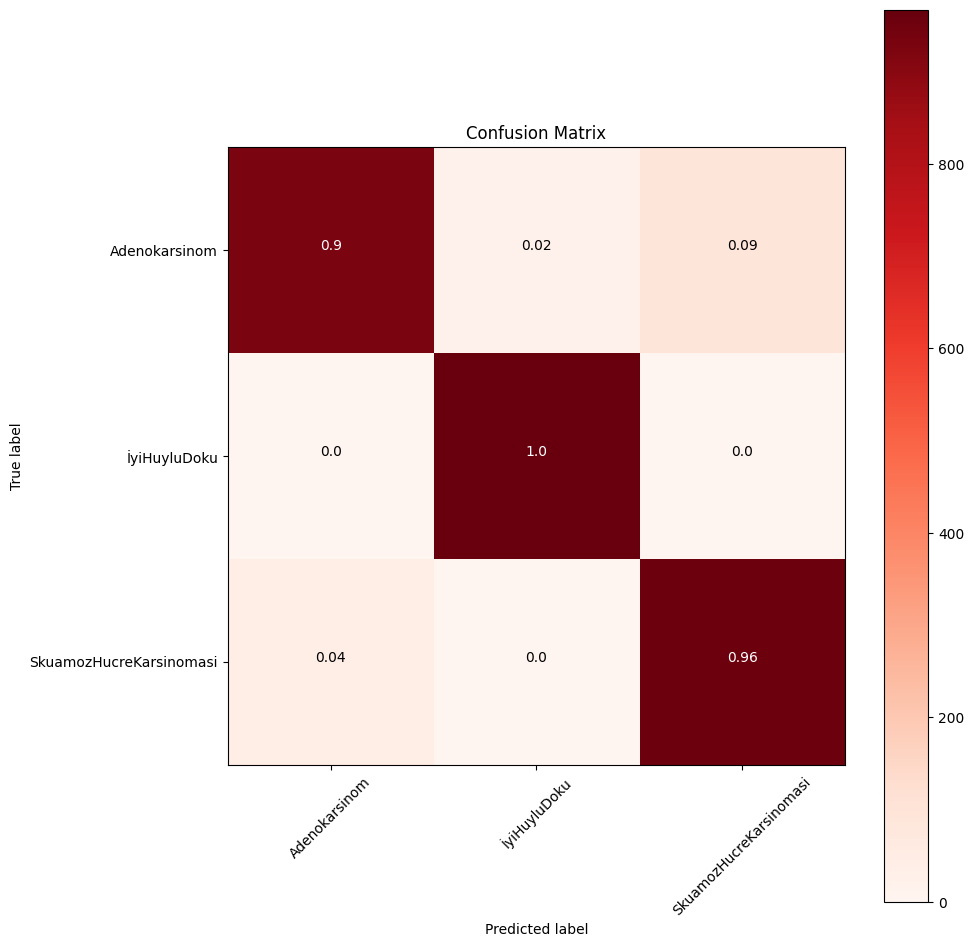

In [28]:
#Karmaşıklık matrisinin yazdırılması
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
classes = ["Adenokarsinom","İyiHuyluDoku","SkuamozHucreKarsinomasi"]
plot_confusion_matrix(cm, classes, title='Confusion Matrix')
